# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observations

The analysis of the weather data confirms my hypothesis - the closer you get to the equator (or latitude=0) the higher the maximum temperature and the further away from the equator the lower the maximum temperature. As one would expect from a planet with a tilted axis, orbiting a star. There is little to no correlation between the latitude and cloudiness, wind speed or humidity. 



# Limitations

The date column was not taken into account and has the potential to skew the anaylsis based on which time of the year and where the data was recorded. Moreover, there many different variables which contribute to weather in specific geographic locations (proximity to water, ocean currents, the jet stream,  etc.). 

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
# Google developer API key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/weather_data_df.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

lat_lngs

In [14]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [15]:
#intital DataFrame for Results
weather_df = pd.DataFrame(cities, columns=['city'])


weather_df['lat'] = ''
weather_df['lng'] = ''
weather_df['max_temp'] = ''
weather_df['humidity'] = ''
weather_df['cloudiness'] = ''
weather_df['windspeed'] = ''
weather_df['country'] = ''
weather_df['date'] = ''

weather_df.head()



,city,lat,lng,max_temp,humidity,cloudiness,windspeed,country,date
0,amderma,,,,,,,,
1,staroutkinsk,,,,,,,,
2,busselton,,,,,,,,
3,carnarvon,,,,,,,,
4,mataura,,,,,,,,


In [16]:
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
w_api = weather_api_key
api = "&appid=" + w_api

print(f'Beginning Data Retrieval \n-----------------------------')

for index, row in weather_df.iterrows():
    
    # get city name from df
    city_name = row['city']
  
    query_url = base_url + city_name + api

    try:
        response = requests.get(query_url)

        j_weather = response.json()
        
        print(f'Processing {city_name}')
    
        weather_df.loc[index, 'lat'] = j_weather['coord']['lat']
        weather_df.loc[index, 'lng'] = j_weather['coord']['lon']
        weather_df.loc[index, 'max_temp'] = j_weather['main']['temp_max']
        weather_df.loc[index, 'humidity'] = j_weather['main']['humidity']
        weather_df.loc[index, 'cloudiness'] = j_weather['clouds']['all']
        weather_df.loc[index, 'windspeed'] = j_weather['wind']['speed']
        weather_df.loc[index, 'country'] = j_weather['sys']['country']
        weather_df.loc[index, 'date'] = j_weather['dt']

    except (KeyError, IndexError):
        print("city not found. skipping...")

Beginning Data Retrieval 
-----------------------------
Processing amderma
city not found. skipping...
Processing staroutkinsk
Processing busselton
Processing carnarvon
Processing mataura
Processing hermanus
Processing bluff
Processing la ronge
Processing victoria
Processing iqaluit
Processing rikitea
Processing avarua
Processing malindi
Processing plettenberg bay
Processing taolanaro
city not found. skipping...
Processing yellowknife
Processing kamra
Processing cherskiy
Processing hobart
Processing waingapu
Processing esperance
Processing astana
Processing sanok
Processing touros
Processing hasaki
Processing ranong
Processing bonavista
Processing pimentel
Processing ushuaia
Processing bubaque
Processing gueret
Processing khatanga
Processing barrow
Processing bloomingdale
Processing nizhneyansk
city not found. skipping...
Processing saint george
Processing punta arenas
Processing jaltenango
Processing tabiauea
city not found. skipping...
Processing marand
Processing emba
Processing run

Processing maridi
Processing shizunai
Processing konstantinovka
Processing ketchenery
city not found. skipping...
Processing neulengbach
Processing kieta
Processing palmares do sul
Processing sao filipe
Processing waddan
Processing bolungarvik
city not found. skipping...
Processing sioux lookout
Processing lerwick
Processing killybegs
Processing timmins
Processing minab
Processing garowe
Processing otterup
Processing bairiki
Processing saint-pacome
city not found. skipping...
Processing altagracia de orituco
Processing nouadhibou
Processing aykhal
Processing kurkino
Processing wewak
Processing ibia
Processing guerrero negro
Processing changping
Processing zuwarah
Processing mezen
Processing santiago
Processing mataram
Processing bouca
Processing nemuro
Processing warqla
city not found. skipping...
Processing tilichiki
Processing valle de guadalupe
Processing jaypur
Processing vanavara
Processing pasni
Processing havre-saint-pierre
Processing solnechnyy
Processing norrtalje
Processing m

In [10]:
weather_df.head()

,city,lat,lng,max_temp,humidity,cloudiness,windspeed,country,date
0,ribeira grande,38.5167,-28.7,296.37,78,40,8.75,PT,1624124246
1,tukrah,32.5341,20.5791,295.91,80,0,4.26,LY,1624124424
2,amderma,,,,,,,,
3,kaitangata,-46.2817,169.846,283.11,87,19,2.71,NZ,1624124265
4,araouane,18.9048,-3.5265,313.4,16,44,3.92,ML,1624124286


In [18]:
#drop the missing values
weather_df.dropna()
weather_df

,city,lat,lng,max_temp,humidity,cloudiness,windspeed,country,date
0,amderma,,,,,,,,
1,staroutkinsk,57.2302,59.3348,288.34,96,100,2.57,RU,1624124622
2,busselton,-33.65,115.333,286.51,85,100,4.13,AU,1624124247
3,carnarvon,-24.8667,113.633,283.19,44,40,1.54,AU,1624124020
4,mataura,-46.1927,168.864,273.97,98,23,1.31,NZ,1624124219
...,...,...,...,...,...,...,...,...,...
606,eydhafushi,5.1033,73.0708,301.46,75,59,6.39,MV,1624124249
607,soligalich,59.0778,42.2864,293.41,72,3,2.64,RU,1624124746
608,iquitos,-3.7481,-73.2472,302.17,74,75,3.6,PE,1624124747
609,san andres,12.5847,-81.7006,304.16,74,75,6.17,CO,1624124747


In [19]:
#convert data types fom object to float
weather_df['lat'] = pd.to_numeric(weather_df['lat'], errors='coerce')
weather_df['lng'] = pd.to_numeric(weather_df['lng'], errors='coerce')
weather_df['max_temp'] = pd.to_numeric(weather_df['max_temp'], errors='coerce')
weather_df['humidity'] = pd.to_numeric(weather_df['humidity'], errors='coerce')
weather_df['cloudiness'] = pd.to_numeric(weather_df['cloudiness'], errors='coerce')
weather_df['windspeed'] = pd.to_numeric(weather_df['windspeed'], errors='coerce')
weather_df['date']=pd.to_numeric(weather_df['date'], errors='coerce')

In [20]:
#convert the max_temp to celcius from kelvin
weather_df["max_temp_cel"] = weather_df['max_temp'] - 273.15

In [21]:
weather_df.dtypes

city             object
lat             float64
lng             float64
max_temp        float64
humidity        float64
cloudiness      float64
windspeed       float64
country          object
date            float64
max_temp_cel    float64
dtype: object

In [22]:
#weather_df.dtypes
weather_df.describe()

,lat,lng,max_temp,humidity,cloudiness,windspeed,date,max_temp_cel
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02,560.000000
mean,19.394255,22.411094,293.968554,70.057143,56.330357,3.313339,1.624125e+09,20.818554
std,33.111902,90.396464,8.227765,20.403978,37.019259,2.230930,2.097880e+02,8.227765
min,-54.800000,-179.166700,272.950000,6.000000,0.000000,0.000000,1.624124e+09,-0.200000
25%,-7.223700,-54.840825,288.167500,59.000000,20.000000,1.710000,1.624124e+09,15.017500
50%,21.602650,25.150750,295.225000,74.000000,62.000000,2.670000,1.624125e+09,22.075000
75%,48.210825,104.723975,299.997500,85.000000,93.000000,4.630000,1.624125e+09,26.847500
max,78.218600,178.416700,316.730000,100.000000,100.000000,15.530000,1.624125e+09,43.580000


In [23]:
#convert the dataframe to csv file
weather_df.to_csv('output_data/weather_data_df.csv')

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
weather_df = weather_df[weather_df['humidity'] < 100]

In [25]:
#  Get the indices of cities that have humidity over 100%.


In [26]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [27]:
clean_weather_data = weather_df
clean_weather_data.head()

,city,lat,lng,max_temp,humidity,cloudiness,windspeed,country,date,max_temp_cel
1,staroutkinsk,57.2302,59.3348,288.34,96.0,100.0,2.57,RU,1.624125e+09,15.19
2,busselton,-33.6500,115.3333,286.51,85.0,100.0,4.13,AU,1.624124e+09,13.36
3,carnarvon,-24.8667,113.6333,283.19,44.0,40.0,1.54,AU,1.624124e+09,10.04
4,mataura,-46.1927,168.8643,273.97,98.0,23.0,1.31,NZ,1.624124e+09,0.82
5,hermanus,-34.4187,19.2345,294.21,49.0,30.0,3.26,ZA,1.624124e+09,21.06


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [28]:
temp_vs_lat = clean_weather_data[['city','lat','max_temp_cel']]
temp_vs_lat

,city,lat,max_temp_cel
1,staroutkinsk,57.2302,15.19
2,busselton,-33.6500,13.36
3,carnarvon,-24.8667,10.04
4,mataura,-46.1927,0.82
5,hermanus,-34.4187,21.06
...,...,...,...
606,eydhafushi,5.1033,28.31
607,soligalich,59.0778,20.26
608,iquitos,-3.7481,29.02
609,san andres,12.5847,31.01


## Latitude vs. Temperature Plot

Text(0, 0.5, 'Temperature (celcius)')

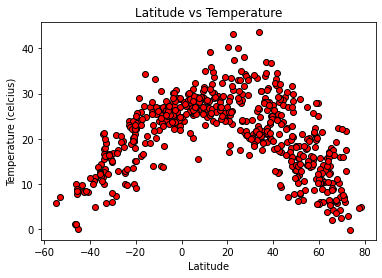

In [35]:
plt.scatter(temp_vs_lat['lat'], temp_vs_lat['max_temp_cel'], facecolors ='red', edgecolors='black')

plt.title('Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (celcius)')

## Latitude vs. Humidity Plot

In [30]:
lat_vs_humd = clean_weather_data[['city','lat','humidity']]

Text(0, 0.5, 'Humidity (%)')

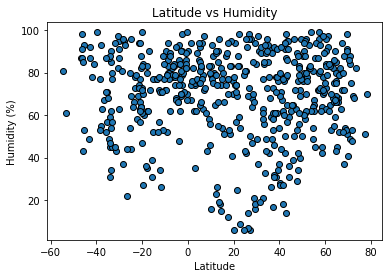

In [37]:
plt.scatter(lat_vs_humd['lat'], lat_vs_humd['humidity'], edgecolor = 'black')

plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

## Latitude vs. Cloudiness Plot

In [39]:
lat_vs_cld = clean_weather_data[['city','lat','cloudiness']]

Text(0, 0.5, 'Cloudiness (%)')

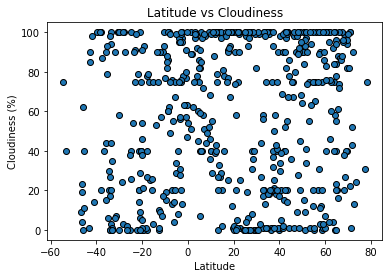

In [45]:
plt.scatter(lat_vs_cld['lat'],lat_vs_cld['cloudiness'], edgecolor ='black')
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

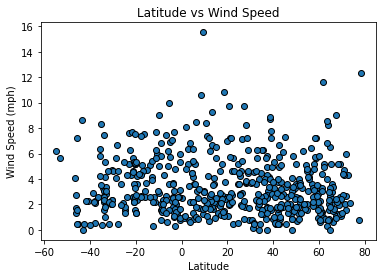

In [46]:
plt.scatter(weather_df['lat'], weather_df['windspeed'], edgecolor= 'black')
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

## Linear Regression

In [201]:
#northern Hemishpere DF
n_hem_df = weather_df[weather_df['lat']>0]
#print(n_hem_df)
x_val_nhem = n_hem_df['lat'].astype(float)
y_val_nhem = n_hem_df['max_temp_cel'].astype(float)

nhem_humid = n_hem_df['humidity'].astype(float)
nhem_cloud = n_hem_df['cloudiness'].astype(float)
nhem_wind = n_hem_df['windspeed'].astype(float)

#Southern Hemisphere DF
s_hem_df = weather_df[weather_df['lat']<0]
print(s_hem_df)
x_val_shem = s_hem_df['lat'].astype(float)
y_val_shem = s_hem_df['max_temp_cel'].astype(float)

shem_humid = s_hem_df['humidity'].astype(float)
shem_cloud = s_hem_df['cloudiness'].astype(float)
shem_wind = s_hem_df['windspeed'].astype(float)


            city      lat       lng  max_temp  humidity  cloudiness  \
1      busselton -33.6500  115.3333    285.95      65.0       100.0   
2    port alfred -33.5906   26.8910    289.12      83.0        33.0   
3          vaini -21.2000 -175.2000    298.24      83.0        20.0   
4           chuy -33.6971  -53.4616    283.33      85.0        59.0   
7         ntcheu -14.8203   34.6359    291.12      57.0        99.0   
..           ...      ...       ...       ...       ...         ...   
611         auki  -8.7676  160.7034    299.04      86.0        88.0   
616        narok  -1.0783   35.8601    285.58      95.0       100.0   
618         buin -33.7333  -70.7500    289.33      55.0         2.0   
631        metro  -5.1131  105.3067    296.05      95.0       100.0   
636    oriximina  -1.7656  -55.8661    299.74      84.0        56.0   

     windspeed country          date  max_temp_cel  
1         5.33      AU  1.624051e+09         12.80  
2         5.72      ZA  1.624051e+09     

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-Value: 0.45019561473933245


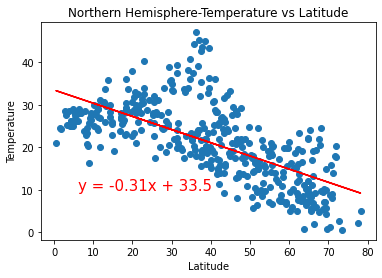

In [189]:
# Run linear regression
(slope_n, intercept_n, rvalue_n, pvalue_n, stderr_n) = linregress(x_val_nhem, y_val_nhem)
regress_values_nhem = x_val_nhem * slope_n + intercept_n
#print(regress_values)
line_eq_nhem = "y = " + str(round(slope_n,2)) + "x + " + str(round(intercept_n,2))

# Plot scatter plot
plt.scatter(x_val_nhem, y_val_nhem)

# Plot regression line
plt.plot(x_val_nhem,regress_values_nhem,"r-")
plt.annotate(line_eq_nhem,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Northern Hemisphere-Temperature vs Latitude')
plt.ylabel('Temperature')
plt.xlabel('Latitude')

# Print r square value
print(f"R-Value: {rvalue_n**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.6522596698518948


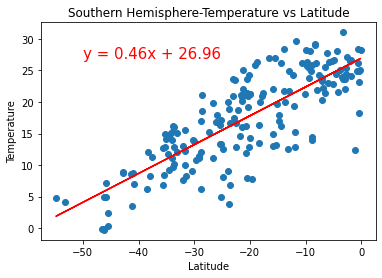

In [207]:
# Run linear regression
(slope_s, intercept_s, rvalue_s, pvalue_s, stderr_s) = linregress(x_val_shem, y_val_shem)
regress_values_shem = x_val_shem * slope_s + intercept_s
line_eq_shem = "y = " + str(round(slope_s,2)) + "x + " + str(round(intercept_s,2))

# Plot scatter plot
plt.scatter(x_val_shem, y_val_shem)

# Plot regression line
plt.plot(x_val_shem,regress_values_shem,"r-")
plt.annotate(line_eq_shem,(-50,27),fontsize=15,color="red")

# Label plot
plt.title('Southern Hemisphere-Temperature vs Latitude')
plt.ylabel('Temperature')
plt.xlabel('Latitude')

# Print r square value
print(f"R squared: {rvalue_s**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-Value: 0.001681324575408418


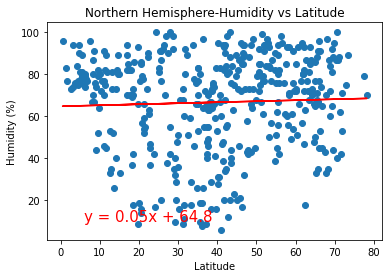

In [191]:
# Run linear regression
(slope_nh, intercept_nh, rvalue_nh, pvalue_nh, stderr_nh) = linregress(x_val_nhem, nhem_humid)
regress_values_nhem_humid = x_val_nhem * slope_nh + intercept_nh
#print(regress_values)
line_eq_nhem_humid = "y = " + str(round(slope_nh,2)) + "x + " + str(round(intercept_nh,2))

# Plot scatter plot
plt.scatter(x_val_nhem, nhem_humid)

# Plot regression line
plt.plot(x_val_nhem, regress_values_nhem_humid,"r-")
plt.annotate(line_eq_nhem_humid,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Northern Hemisphere-Humidity vs Latitude')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

# Print r square value
print(f"R-Value: {rvalue_nh**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-Value: 0.001681324575408418


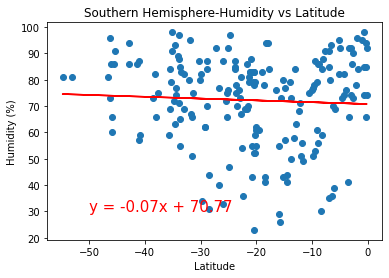

In [202]:
# Run linear regression
(slope_sh, intercept_sh, rvalue_sh, pvalue_sh, stderr_sh) = linregress(x_val_shem, shem_humid)
regress_values_shem_humid = x_val_shem * slope_sh + intercept_sh
#print(regress_values)
line_eq_shem_humid = "y = " + str(round(slope_sh,2)) + "x + " + str(round(intercept_sh,2))

# Plot scatter plot
plt.scatter(x_val_shem, shem_humid)

# Plot regression line
plt.plot(x_val_shem, regress_values_shem_humid,"r-")
plt.annotate(line_eq_shem_humid,(-50,30),fontsize=15,color="red")

# Label plot
plt.title('Southern Hemisphere-Humidity vs Latitude')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

# Print r square value
print(f"R-Value: {rvalue_nh**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-Value: 0.001089370836485146


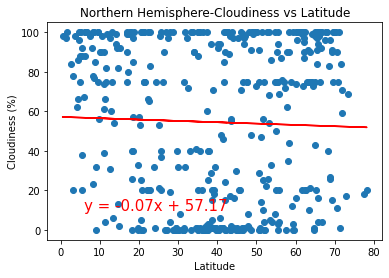

In [193]:
# Run linear regression
(slope_nc, intercept_nc, rvalue_nc, pvalue_nc, stderr_nc) = linregress(x_val_nhem, nhem_cloud)
regress_values_nhem_cloud = x_val_nhem * slope_nc + intercept_nc
#print(regress_values)
line_eq_nhem_cloud = "y = " + str(round(slope_nc,2)) + "x + " + str(round(intercept_nc,2))

# Plot scatter plot
plt.scatter(x_val_nhem, nhem_cloud)

# Plot regression line
plt.plot(x_val_nhem, regress_values_nhem_cloud,"r-")
plt.annotate(line_eq_nhem_cloud,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Northern Hemisphere-Cloudiness vs Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

# Print r square value
print(f"R-Value: {rvalue_nc**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-Value: 0.05421698741142043


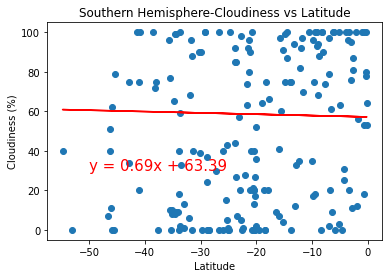

In [203]:
# Run linear regression
(slope_sc, intercept_sc, rvalue_sc, pvalue_sc, stderr_sc) = linregress(x_val_shem, shem_cloud)
regress_values_shem_cloud = x_val_shem * slope_nc + intercept_nc
#print(regress_values)
line_eq_shem_cloud = "y = " + str(round(slope_sc,2)) + "x + " + str(round(intercept_sc,2))

# Plot scatter plot
plt.scatter(x_val_shem, shem_cloud)

# Plot regression line
plt.plot(x_val_shem, regress_values_shem_cloud,"r-")
plt.annotate(line_eq_shem_cloud,(-50,30),fontsize=15,color="red")

# Label plot
plt.title('Southern Hemisphere-Cloudiness vs Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

# Print r square value
print(f"R-Value: {rvalue_sc**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-Value: 0.002975715815611969


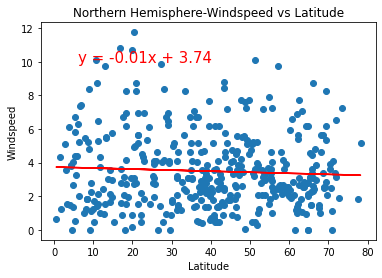

In [195]:
# Run linear regression
(slope_nw, intercept_nw, rvalue_nw, pvalue_nw, stderr_nw) = linregress(x_val_nhem, nhem_wind)
regress_values_nhem_wind = x_val_nhem * slope_nw + intercept_nw
#print(regress_values)
line_eq_nhem_wind = "y = " + str(round(slope_nw,2)) + "x + " + str(round(intercept_nw,2))

# Plot scatter plot
plt.scatter(x_val_nhem, nhem_wind)

# Plot regression line
plt.plot(x_val_nhem, regress_values_nhem_wind,"r-")
plt.annotate(line_eq_nhem_wind,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Northern Hemisphere-Windspeed vs Latitude')
plt.ylabel('Windspeed')
plt.xlabel('Latitude')

# Print r square value
print(f"R-Value: {rvalue_nw**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-Value: 0.0011923132612859718


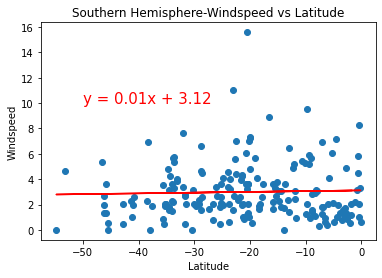

In [208]:
# Run linear regression
(slope_sw, intercept_sw, rvalue_sw, pvalue_sw, stderr_sw) = linregress(x_val_shem, shem_wind)
regress_values_shem_wind = x_val_shem * slope_sw + intercept_sw
#print(regress_values)
line_eq_shem_wind = "y = " + str(round(slope_sw,2)) + "x + " + str(round(intercept_sw,2))

# Plot scatter plot
plt.scatter(x_val_shem, shem_wind)

# Plot regression line
plt.plot(x_val_shem, regress_values_shem_wind,"r-")
plt.annotate(line_eq_shem_wind,(-50,10),fontsize=15,color="red")

# Label plot
plt.title('Southern Hemisphere-Windspeed vs Latitude')
plt.ylabel('Windspeed')
plt.xlabel('Latitude')

# Print r square value
print(f"R-Value: {rvalue_sw**2}")

# Show plot
plt.show()